<a href="https://colab.research.google.com/github/greymouse1/geospatialObjectDetection/blob/main/Ex2Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Copywrite 2024, Duality Robotics

# Detailed instructions for the Exercise 2 process can be found at:
# falcon.duality.ai/secure/documentation/ex2-colab-install
#
# Specific instructions for this step start at:
# falcon.duality.ai/secure/documentation/ex2-colab-setup

# In order for you to use this notebook, you first need to upload to Google
# Drive the output data generated by Falcon and the testing images.
#
# Note:  This process does need access to read/write files on your Google Drive.
# If you don't want Colab to have access to your Google Drive, you can
# upload to a Google account you set up just for experiments.


# 1

# This module provides a portable way of using operating system dependent
# functionality
import os, sys
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# 2

# We  need to make sure we are running a GPU enabled instance.  If this
# fails, go to the Edit menu, choose 'Notebook settings' and select a 'T4 GPU'
# under Hardware Accelerator.
# The GPU makes the training go MUCH faster, so it's worth setting up now.
!nvidia-smi

Sat Nov 22 23:55:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
#3

# Now we install Ultralytics, the specific python version, and
# CUDA. These are all files needed for training.

# Those using their local machine have to download and install these, plus a
# conda environment to contain this specific setup. By using Colab, you are
# avoiding this and all the issues that may arise during the process.

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.3/112.6 GB disk)


In [16]:
#4

# Now we mount (connect) the folder on Drive containing the training data.
# You will have to grant Colab access to your drive where you stored Exercise2.
# After running the code below, the system will access for credentials - enter
# the ones for the particular Google account that controls the folder that
# contains the Falcon datasets.

# Note:  You may find that this does not work if the notebook and the Drive
# folder are owned by different Google accounts.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#5

# Now change directory to the folder containing your
# Output/(time_and_date_label_of_dataset). It might look like this:
#
# %cd /content/drive/MyDrive/ColabNotebooks/Exercise2/Output/2024-10-30-16-16-04

# MAKE SURE TO DELETE THE SPACE IN THE COLABNOTEBOOK FILE NAME
# If you don't, this cell might not connect
# correct is /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57

%cd /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57
!ls

/content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57
classes.txt  train     val	     yolo_params.yaml
predict.py   train.py  visualize.py  yolov8s.pt


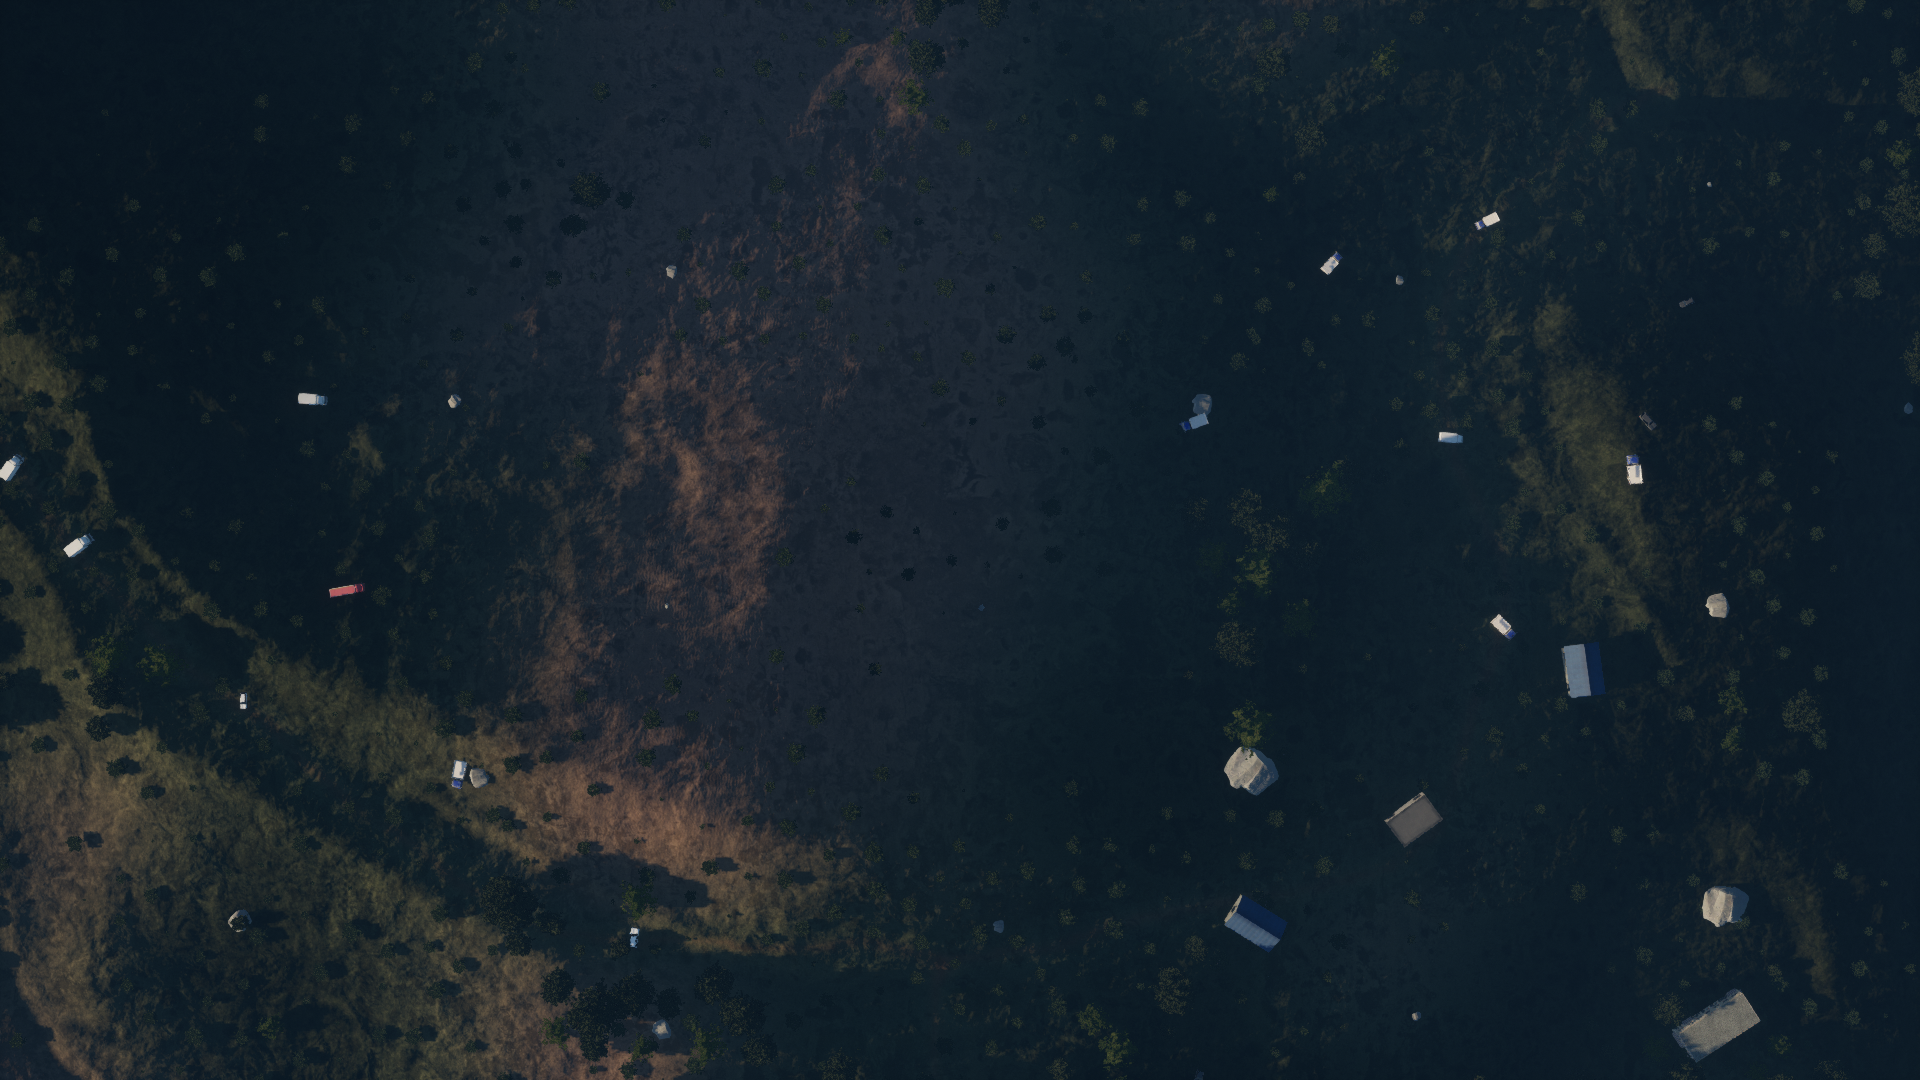

In [7]:
#6

# This is a quick test to confirm that you've moved to the right folder and
# that the notebook can access the images.  You can hide the output after the
# test.
from IPython.display import Image
Image('./train/images/000000001.png')

In [8]:
#7

# Now that we have access to the images, we can run the training script
# that Falcon created when it generated the data set.

# Please note that this will take a little while - 20-30 minutes.
# You may need to stay active on the page to avoid a timeout.
# You may notice that the output pauses at times, particuarly at the start.

# While this runs, open and read the Training Files and Best Practices page:
# falcon.duality.ai/secure/documentation/ex2-colab--training

# Also open and read the Understanding the Training Outputs page:
# falcon.duality.ai/secure/documentation/ex2-colab-training-output

# On these pages you'll learn about the training output metrics and files.

#!pip install -U ultralytics
%run train.py

New https://pypi.org/project/ultralytics/8.3.230 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/yolov8s.pt, data=/content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/yolo_params.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffe

100%|██████████| 755k/755k [00:00<00:00, 29.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 116MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/train/labels... 359 images, 30 backgrounds, 0 corrupt: 100%|██████████| 359/359 [02:24<00:00,  2.49it/s]


train: New cache created: /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1837: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/val/labels... 41 images, 5 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:32<00:00,  1.28it/s]

val: New cache created: /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1837: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.48G      2.001      3.497      1.126         54        640: 100%|██████████| 23/23 [00:35<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]

                   all         41        412      0.961     0.0674      0.183      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.41G       1.21     0.9664     0.8692         57        640: 100%|██████████| 23/23 [00:25<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         41        412      0.924      0.371      0.445      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.18G      1.099     0.8115     0.8485         69        640: 100%|██████████| 23/23 [00:31<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         41        412      0.651      0.452      0.526      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.24G      1.006     0.6934     0.8476         60        640: 100%|██████████| 23/23 [00:28<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         41        412      0.624      0.594      0.611      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.24G     0.9268     0.6238      0.829         73        640: 100%|██████████| 23/23 [00:28<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         41        412      0.695      0.599      0.643      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       4.2G       0.92     0.6015     0.8222         41        640: 100%|██████████| 23/23 [00:28<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         41        412      0.695      0.651      0.666      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.29G     0.9215     0.6017       0.82         79        640: 100%|██████████| 23/23 [00:29<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         41        412      0.724      0.648      0.696      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.26G      0.914     0.5907     0.8244         99        640: 100%|██████████| 23/23 [00:30<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         41        412      0.718      0.661      0.696      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.03G     0.8788     0.5479     0.8168         37        640: 100%|██████████| 23/23 [00:28<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         41        412      0.746      0.662      0.703       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.02G     0.8917     0.5639      0.822         60        640: 100%|██████████| 23/23 [00:29<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         41        412      0.736      0.664      0.709      0.484



10 epochs completed in 0.097 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


                   all         41        412      0.736      0.664      0.709      0.483
              building         29        262      0.802      0.908      0.931      0.741
               vehicle         30        150       0.67       0.42      0.486      0.225
Speed: 0.3ms preprocess, 4.0ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train


<Figure size 640x480 with 0 Axes>

In [19]:
#8

# The training process will output a mAP50 score, but this score doesn't necessarily
# indicate that the model will perform well when shown images from the physical
# world. A low mAP50 is a bad sign, but a high mAP50 is just a step in the right
# direction.

# In order to see how the model performs in the physical world, we must test it
# on images from the physcial world.

# At this point, make sure to read the "Understanding the Training Outputs" page
# if you haven't already:
# falcon.duality.ai/secure/documentation/ex2-colab-training-output
# This page will give you context for the process before you move on to testing.

# When you're ready, run the test script by pressing "play" on this cell.
# This script tells the YOLO model to look at the images in the testImages
# folder and make predictions.

# If this isn't the first time you're run this training,
# the system will prompt you to select which model you'd like to validate. Just
# choose the highest number to test the latest.

# While this is processing, read this page:
# falcon.duality.ai/secure/documentation/ex2-colab-testing-output

%run predict.py


image 1/1 /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/../testImages/images/102.jpg: 640x544 38 buildings, 1 vehicle, 68.6ms
Speed: 5.5ms preprocess, 68.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/../testImages/images/103.jpg: 640x576 2 buildings, 2 vehicles, 75.3ms
Speed: 5.7ms preprocess, 75.3ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/../testImages/images/107.jpg: 416x640 (no detections), 58.5ms
Speed: 4.1ms preprocess, 58.5ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/../testImages/images/11.jpg: 320x640 (no detections), 49.8ms
Speed: 2.3ms preprocess, 49.8ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)

image 1/1 /content/drive/MyDrive

val: Scanning /content/drive/MyDrive/ColabNotebooks/Exercise2/testImages/labels... 0 images, 844 backgrounds, 0 corrupt: 100%|██████████| 844/844 [00:08<00:00, 95.78it/s] 

val: WARNING ⚠️ No labels found in /content/drive/MyDrive/ColabNotebooks/Exercise2/testImages/labels.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


val: New cache created: /content/drive/MyDrive/ColabNotebooks/Exercise2/testImages/labels.cache
WARNING ⚠️ No labels found in /content/drive/MyDrive/ColabNotebooks/Exercise2/testImages/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:33<00:00,  1.56it/s]

                   all        844          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 0.3ms preprocess, 8.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val


<Figure size 640x480 with 0 Axes>